In [25]:
!pip install scipy tensorflow numpy


**Upload dataset to Colab**

In [26]:
from google.colab import files
uploaded = files.upload()


Saving nn_dataset.mat to nn_dataset (2).mat


**Load dataset**

In [27]:
import scipy.io as sio

data = sio.loadmat('nn_dataset_v6.mat')

X_train = data['X_train']
Y_train = data['Y_train']
X_test  = data['X_test']
Y_test  = data['Y_test']

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2048, 1, 1, 1200)
(1200, 1)
(2048, 1, 1, 300)
(300, 1)


In [28]:
# Convert complex vectors → (N, 2048, 2)
def complex_to_2ch(x):
    x = x.squeeze()    # remove single dimensions
    I = np.real(x)
    Q = np.imag(x)
    return np.stack([I, Q], axis=-1)

X_train = complex_to_2ch(X_train)
X_test  = complex_to_2ch(X_test)

print("Processed Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


Processed Shapes:
X_train: (2048, 1200, 2)
X_test : (2048, 300, 2)


**Reshape for TensorFlow**

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)




X_train shape: (2048, 1200, 2)
X_test shape: (2048, 300, 2)


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = 6   # BPSK,QPSK,QAM16,AM,FM,FSK

model = models.Sequential([
    layers.Conv1D(32, 5, activation='relu', padding='same', input_shape=(2048,2)),
    layers.MaxPooling1D(2),

    layers.Conv1D(64, 5, activation='relu', padding='same'),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 5, activation='relu', padding='same'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 2048, 32)       │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1024, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1024, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 512, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 256, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,246,950 (16.20 MB)

 Trainable params: 4,246,950 (16.20 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)


X_train: (2048, 1200, 2)
Y_train: (1200, 1)
X_test: (2048, 300, 2)
Y_test: (300, 1)


In [37]:
X_train = np.transpose(X_train, (1, 0, 2))
X_test  = np.transpose(X_test,  (1, 0, 2))

print("Fixed X_train:", X_train.shape)
print("Fixed X_test:", X_test.shape)


Fixed X_train: (1200, 2048, 2)
Fixed X_test: (300, 2048, 2)


In [39]:
num_classes = 7

model = models.Sequential([
    layers.Conv1D(32, 5, activation='relu', padding='same', input_shape=(2048,2)),
    layers.MaxPooling1D(2),

    layers.Conv1D(64, 5, activation='relu', padding='same'),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 5, activation='relu', padding='same'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 0.4683 - loss: 1.4542 - val_accuracy: 0.8750 - val_loss: 0.2503
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.9266 - loss: 0.2098 - val_accuracy: 0.9417 - val_loss: 0.1462
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.9382 - loss: 0.1276 - val_accuracy: 0.8750 - val_loss: 0.2038
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.9198 - loss: 0.1391 - val_accuracy: 0.9417 - val_loss: 0.1263
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.9609 - loss: 0.0924 - val_accuracy: 0.9417 - val_loss: 0.1239
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.9800 - loss: 0.0607 - val_accuracy: 0.9458 - val_loss: 0.1288
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.9976 - loss: 0.0297 - val_accuracy: 0.9417 - val_loss: 0.1331
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy:

In [41]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9310 - loss: 0.3293
Test Accuracy: 0.9433333277702332


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


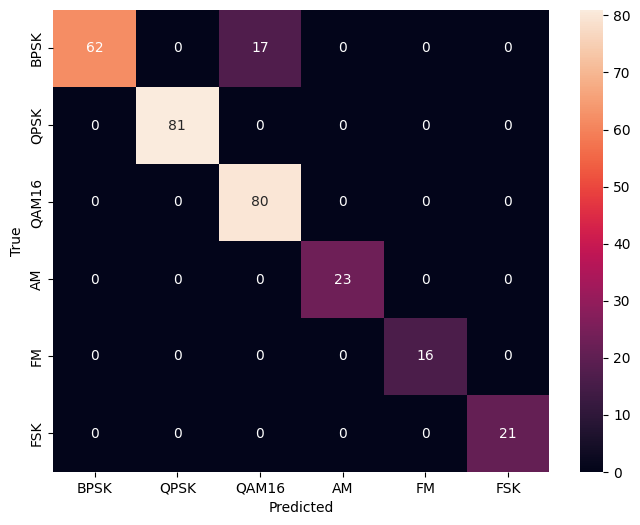

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred = model.predict(X_test)
pred_labels = np.argmax(pred, axis=1)

cm = confusion_matrix(Y_test, pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=['BPSK','QPSK','QAM16','AM','FM','FSK'],
            yticklabels=['BPSK','QPSK','QAM16','AM','FM','FSK'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [43]:
model.save("modulation_cnn.h5")
from google.colab import files
files.download("modulation_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

# ⭐ STEP 6 — Evaluate Accuracy (RUN THIS HERE)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 1.0000 - loss: 2.1559e-04 - val_accuracy: 0.9500 - val_loss: 0.2425
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 1.0000 - loss: 2.1045e-04 - val_accuracy: 0.9500 - val_loss: 0.2511
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 1.0000 - loss: 1.7855e-04 - val_accuracy: 0.9458 - val_loss: 0.2640
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 1.0000 - loss: 1.5346e-04 - val_accuracy: 0.9500 - val_loss: 0.2575
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 1.0000 - loss: 1.4637e-04 - val_accuracy: 0.9500 - val_loss: 0.2524
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 1.0000 - loss: 1.3445e-04 - val_accuracy: 0.9500 - val_loss: 0.2508
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 1.0000 - loss: 1.3463e-04 - val_accuracy: 0.9500 - val_loss: 0.2698
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 1.0000 - 